In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

In [2]:
# import the hand-measured fruit sizes
measured_A = pd.read_excel (r'C:/Users/jessi/Desktop/4. Data/4. IP Cameras/3. Size validation/measured_sizes.xlsx', sheet_name='CamA')
measured_B = pd.read_excel (r'C:/Users/jessi/Desktop/4. Data/4. IP Cameras/3. Size validation/measured_sizes.xlsx', sheet_name='CamB')

In [3]:
# combine measured A and measured B to give measured_AB
measured_AB = pd.concat([measured_A, measured_B])
len(measured_AB)

120

In [4]:
measured_AB.columns

Index(['Width_cm', 'Length_cm', 'Weight_kg'], dtype='object')

In [5]:
# save the average values
mean_measured_width = measured_AB.Width_cm.mean()
mean_measured_length = measured_AB.Length_cm.mean()
mean_measured_weight = measured_AB.Weight_kg.mean()

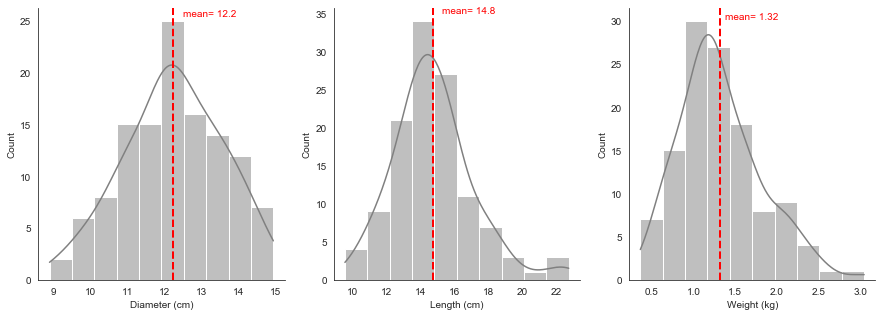

In [6]:
sns.set_style("white")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(measured_AB, x='Width_cm', bins=10, ax=ax1, kde=True, color="gray")
ax1.set(xlabel='Diameter (cm)')
ax1.axvline(x=mean_measured_width, linestyle='dashed', linewidth=2, color="red", label="mean")
ax1.text(x = measured_AB["Width_cm"].mean()+0.25,
 y = max([h.get_height() for h in ax1.patches])+0.5, # y-coordinate position of data label, to take max height 
 s = "mean= {:.1f}".format(measured_AB["Width_cm"].mean()), # data label
 color = "red")

sns.histplot(measured_AB, x='Length_cm', bins=10, ax=ax2, kde=True, color="gray")
ax2.set(xlabel='Length (cm)')
ax2.axvline(x=mean_measured_length, linestyle='dashed', linewidth=2, color="red")
ax2.text(x = measured_AB["Length_cm"].mean()+0.5,
 y = max([h.get_height() for h in ax2.patches])+1, # y-coordinate position of data label, to take max height 
 s = "mean= {:.1f}".format(measured_AB["Length_cm"].mean()), # data label
 color = "red")

sns.histplot(measured_AB, x='Weight_kg', bins=10, ax=ax3, kde=True, color="gray")
ax3.set(xlabel='Weight (kg)')
ax3.axvline(x=mean_measured_weight, linestyle='dashed', linewidth=2, color="red")
ax3.text(x = measured_AB["Weight_kg"].mean()+0.05,
 y = max([h.get_height() for h in ax3.patches])+0.25, # y-coordinate position of data label, to take max height 
 s = "mean= {:.2f}".format(measured_AB["Weight_kg"].mean()), # data label
 color = "red")

sns.despine(top=True, right=True)



In [7]:
# import the fruit sizes predicted using Mask RCNN (160images, coco, noAug, ResNet50)
fruitsize_AB = pd.read_csv('fruitsize_CamAB_AugFlipLR_coco_resnet50.csv', sep=',',header=None, names=["Width_px", "Length_px"])

In [8]:
fruitsize_AB.columns

Index(['Width_px', 'Length_px'], dtype='object')

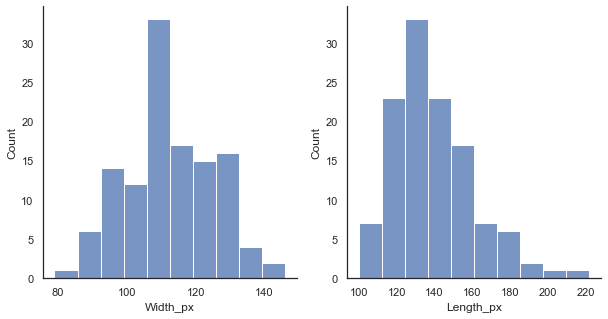

In [9]:
sns.set_theme()
sns.set_style("white")

fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(fruitsize_AB, x='Width_px', bins=10, ax=ax1)

sns.histplot(fruitsize_AB, x='Length_px', bins=10, ax=ax2)

sns.despine(top=True, right=True)

In [10]:
# scale all of the arrays

from sklearn import preprocessing

measured_width_scaled = preprocessing.scale(measured_AB["Width_cm"])
measured_length_scaled = preprocessing.scale(measured_AB["Length_cm"])

predicted_width_scaled = preprocessing.scale(fruitsize_AB["Width_px"])
predicted_length_scaled = preprocessing.scale(fruitsize_AB["Length_px"])

In [11]:
measured_width_scaled[-1]

0.5660912660542652

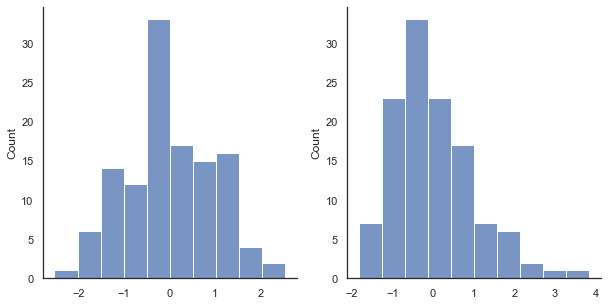

In [12]:
sns.set_style("white")

fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(predicted_width_scaled, bins=10, ax=ax1)

sns.histplot(predicted_length_scaled, bins=10, ax=ax2)

sns.despine(top=True, right=True)

In [13]:
# cbind the np arrays
meas_pred_concat = np.c_[ measured_width_scaled, measured_length_scaled, predicted_width_scaled, predicted_length_scaled ] 
meas_pred_concat

array([[-3.60667566e-02, -4.28045298e-01,  1.78487853e+00,
         1.89603533e+00],
       [ 6.03726142e-01, -1.95526865e-01,  1.33125443e+00,
         1.33839155e+00],
       [ 1.61986781e+00,  1.55893041e+00,  1.78487853e+00,
         3.05779322e+00],
       [ 1.14472749e-01, -4.28045298e-01,  1.48246246e+00,
         5.01925876e-01],
       [ 1.69513756e+00,  1.26299785e+00,  7.89173629e-01,
         9.10399947e-01],
       [ 8.67170277e-01,  6.28856673e-01,  6.31917274e-01,
        -5.67820783e-01],
       [ 8.67170277e-01,  2.27233924e-01,  1.40685845e+00,
        -3.34539800e-01],
       [ 9.04805154e-01,  5.65442554e-01,  1.27152726e+00,
         1.36302082e+00],
       [ 2.65012255e-01, -2.16664904e-01,  2.01169058e+00,
         1.66368376e+00],
       [ 1.88331194e+00,  2.99631709e+00,  1.48246246e+00,
         2.36073849e+00],
       [ 2.03385145e+00,  1.81258688e+00,  1.33125443e+00,
         1.84956502e+00],
       [ 1.99621657e+00,  3.37680180e+00,  2.00488622e+00,
      

In [14]:
colnames = ["meas_width", "meas_length", "pred_width", "pred_length"]

scaled_df = pd.DataFrame(meas_pred_concat.reshape(-1, 4), columns=colnames)
scaled_df

,meas_width,meas_length,pred_width,pred_length
0,-0.036067,-0.428045,1.784879,1.896035
1,0.603726,-0.195527,1.331254,1.338392
2,1.619868,1.558930,1.784879,3.057793
3,0.114473,-0.428045,1.482462,0.501926
4,1.695138,1.262998,0.789174,0.910400
...,...,...,...,...
115,-0.299511,-0.153251,0.045986,0.083693
116,1.017710,1.030479,-1.239282,-1.775120
117,-0.036067,0.079268,-0.483242,-0.938654
118,-0.638225,-0.723978,-1.012470,-0.845713


In [15]:
scaled_meas = scaled_df[["meas_width", "meas_length"]]

labeltype = ["meas"]*scaled_meas.shape[0]
scaled_meas.insert(2, "type", "measured")
sc_meas = scaled_meas.rename(columns = {'meas_width': 'Diameter', 'meas_length': 'Length'}, inplace = False)
                     
sc_meas

,Diameter,Length,type
0,-0.036067,-0.428045,measured
1,0.603726,-0.195527,measured
2,1.619868,1.558930,measured
3,0.114473,-0.428045,measured
4,1.695138,1.262998,measured
...,...,...,...
115,-0.299511,-0.153251,measured
116,1.017710,1.030479,measured
117,-0.036067,0.079268,measured
118,-0.638225,-0.723978,measured


In [16]:
scaled_pred = scaled_df[["pred_width", "pred_length"]]

labeltype = ["pred"]*scaled_pred.shape[0]
scaled_pred.insert(2, "type", "predicted")
sc_pred = scaled_pred.rename(columns = {'pred_width': 'Diameter', 'pred_length': 'Length'}, inplace = False)

sc_pred

,Diameter,Length,type
0,1.784879,1.896035,predicted
1,1.331254,1.338392,predicted
2,1.784879,3.057793,predicted
3,1.482462,0.501926,predicted
4,0.789174,0.910400,predicted
...,...,...,...
115,0.045986,0.083693,predicted
116,-1.239282,-1.775120,predicted
117,-0.483242,-0.938654,predicted
118,-1.012470,-0.845713,predicted


In [17]:
sc = pd.concat([sc_meas, sc_pred], ignore_index=True)
sc

,Diameter,Length,type
0,-0.036067,-0.428045,measured
1,0.603726,-0.195527,measured
2,1.619868,1.558930,measured
3,0.114473,-0.428045,measured
4,1.695138,1.262998,measured
...,...,...,...
235,0.045986,0.083693,predicted
236,-1.239282,-1.775120,predicted
237,-0.483242,-0.938654,predicted
238,-1.012470,-0.845713,predicted


In [18]:
# there isn't a neat way to move legends in seaborn so define this function to do the job

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

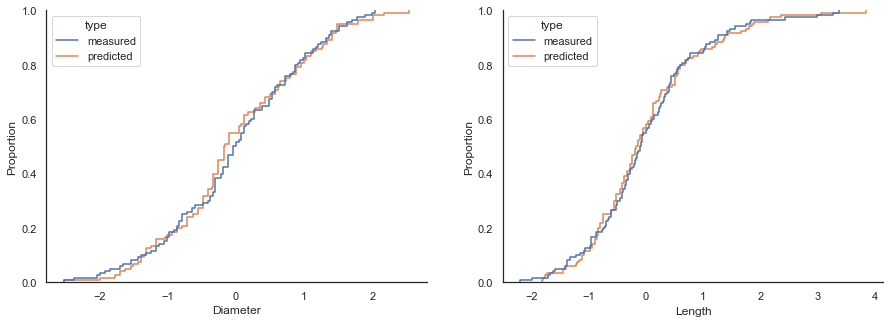

In [19]:
sns.set_style("white")

fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(15, 5))

sns.ecdfplot(data=sc, x="Diameter", hue="type", ax=ax1)
move_legend(ax1, "upper left")

sns.ecdfplot(data=sc, x="Length", hue="type", ax=ax2)
move_legend(ax2, "upper left")

sns.despine(top=True, right=True)

# note that the inconsistencies we see, esp wrt length, may be due to orientation of pineapple

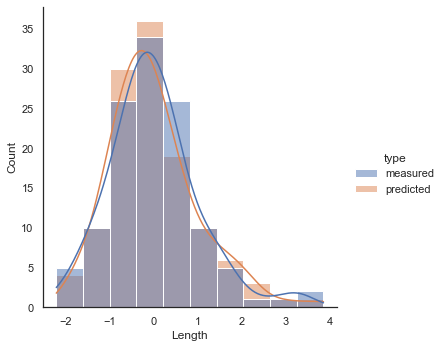

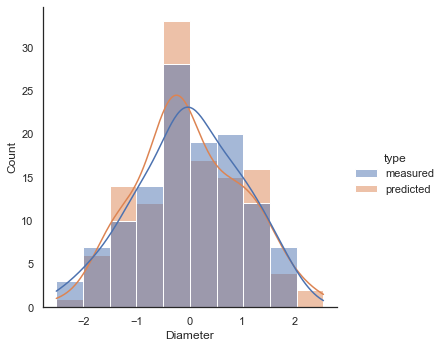

In [21]:
# plot as overlapping histograms
# SCALED

sns.displot(sc, x="Length", hue="type", bins=10, kde=True)
sns.displot(sc, x="Diameter", hue="type", bins=10, kde=True)

In [22]:
# computing KS statistic for scaled widths
stats.ks_2samp(sc_meas["Diameter"], sc_pred["Diameter"])

Ks_2sampResult(statistic=0.08333333333333333, pvalue=0.8011935641620114)

In [23]:
# computing KS statistic for scaled lengths
stats.ks_2samp(sc_meas["Length"], sc_pred["Length"])

Ks_2sampResult(statistic=0.058333333333333334, pvalue=0.9874700030874857)

In [24]:
# Z-test for diameter

ztest ,pval = stests.ztest(sc_meas["Diameter"], x2=sc_pred["Diameter"], value=0,alternative='two-sided')
print(ztest, float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

-8.592389456946173e-15 0.9999999999999931
accept null hypothesis


In [25]:
# Z-test for length 

ztest ,pval = stests.ztest(sc_meas["Length"], x2=sc_pred["Length"], value=0,alternative='two-sided')
print(ztest, float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

6.6227054950548565e-15 0.9999999999999947
accept null hypothesis
